# Neuronové sítě a perceptron

## Co je to umělá inteligence?
Když se řekne **umělá inteligence**, ne vždy se musí jednat o neuronovou síť. Z našeho pohledu je umělá inteligence chytrý algoritmus, který nám pomáhá řešit konkrétní úlohu bez toho, aniž bychom museli složitě nastavovat podmínky a tím říkat, jak se má tento algoritmus chovat.


## Kde se s ní setkáme?
- Počítačové hry
- Autonomní vozidla
- Lékařství, průmysl
- Sociální sítě, vyhledávání na internetu
- Spousta dalších míst...

## K čemu neuronové sítě používáme?

- Klasifikátory
  - Řešením úlohy je klasifikace problému do jedné z N tříd ("pes", "kočka", "kráva")?
- Detektory
  - Svým způsobem se jedná o klasifikátor, který úlohu dělí pouze do 2 tříd. Detektor nám pouze říká "ano" nebo "ne"
- Regrese
  - Na základě známých veličin umíme odhadnout hodnotu nějaké neznámé veličiny

# Přímky
Ačkoli se to nezdá, přímky nám pomohou pochopit základy neuronových sítí. Určitě víte, že se dá přímka zapsat různými způsoby. Nejčastěji se setkáme s parametrickým, směrnicovým či obecným tvarem přímky. Jednotlivé tvary se mezi sebou dají převádět a každý z nich je většinou vhodný pro jiný typ využití.


## Směrnicový tvar přímky
$
y = kx + q
$
- většinou známe směrnici `k` a posunutí na ose y `q`
- typická úloha u přímky v tomto tvaru je zjistit, zda nějaký bod na této přímce leží, případně dopočítat za pomocí jedné souřadnice bodu druhou
- pokud chceme přímku v tomto tvaru vykreslit, iterujeme hodnotu `x` (pomiňme nyní problémy s jemností vykreslení dopočítavané osy. Jenom si řekněme, že pro vykreslování přímky se lépe hodí parametrický tvar přímky)

## Obecný tvar přímky
$
0 = ax + by + c
$
- typická úlohy u přímky v tomto tvaru jsou zjištění průsečíků či ověření, zda bod na přímce leží
- můžeme využít nerovnosti a zjistit, na které polorovině se hledaný bod nachází

Obecný tvar přímky můžeme jednoduše přepsat na směrnicový tvar:

\begin{align}
0 & = ax + by + c \\
by & = -ax - c \\
y & = -\frac{a}{b}x - \frac{c}{b} \\
k & = -\frac{a}{b} \\
q & = -\frac{c}{b} \\
y & = kx + q
\end{align}

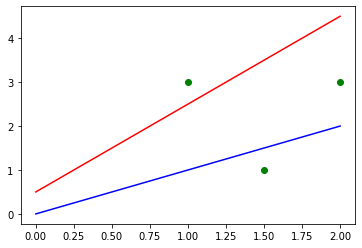

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

k = 1
q = 0
x = np.linspace(0, 2)
plt.plot(x, k*x + q, linestyle='-', color='blue')

k = 2
q = 0.5
x = np.linspace(0, 2)
plt.plot(x, k*x + q, linestyle='-', color='red')

for point in [(1,3), (1.5,1), (2,3)]:
    plt.scatter(point[0], point[1], color='green')

**Cvičení:** Zkuste si spočítat polohu zadaných bodů vůči těmto dvou přímkám zadaných ve směrnicovém tvaru:

$$
A = [1, 3], B = [1.5, 1], C = [2, 3]
$$

$$
p: y = x \\
q: y = 2x+0.5
$$

# Fičury, signály, příznaky...

V příkladu výše jsou zakresleny 2 body o souřadnicích $(x, y)$. Tyto body v prostoru mohou reprezentovat libovolný reálný či abstraktní objekt světa o dvou signifikantních vlastnostech, které tento objekt co nejlépe popisují.

V případě, že bychom chtěli klasifikovat zvířata do 3 tříd (pes, kráva, slon), může atribut $x$ být váhou a atribut $y$ výškou zvířete. Kdybychom chtěli určit, zda je člověk nemocný, tyto vlastnosti by byly například teplota a tlak.

Těmto atributům budeme dále říkat signály, příznaky, či featury. V praxi nám však často pouze 2 příznaky nestačí. Máme komplexní systémy, ve kterých je aktuální stav popsán několika desítkami atributů (představte si například autonomní vozidlo, kde máme aktuální rychlost, natočení kol, vzdálenost od překážek a další). Zavedeme si proto pojem *feature vektor*, který bude složen z atributů $(x_0, x_1, ..., x_N)$. Samozřejmě, pokud se nám zvýší počet atributů vektoru, zvětší se nám i dimenze prostoru, ve kterém se tento vektor nachází. V případě tří atributů se nacházíme ve 3D prostoru a místo přímky budeme tento prostor dělit rovinou. V případě 4D prostoru hyperrovinou atd.

0.0,0.0,1.0 -> 1.0
0.0,1.0,1.0 -> 1.0
0.3,0.0,1.0 -> 0.0
0.0,0.2,1.0 -> 1.0
1.0,0.0,1.0 -> 0.0
1.0,1.0,1.0 -> 0.0


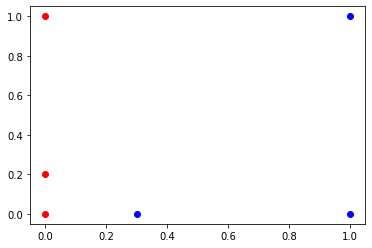

In [12]:
import random

dataset = "drugs.csv"
dataset = "xor.csv"
#dataset = "and.csv"

samples = []
with open("./01/datasets/{0}".format(dataset), "r") as dataset_f:
    content = dataset_f.read()
    for row in content.split("\n"):
        columns = list(map(float, row.split(",")))
        samples.append((np.array(columns[:-1]), columns[-1]))
        print(",".join(map(str,np.array(columns[:-1])))+" -> "+str(columns[-1]))

for sample in samples:
    plt.scatter(sample[0][0], sample[0][1], color='blue' if sample[1] == 0 else 'red')

## Neuron

Matematický model neuronu je inspirován biologickým neuronem, který je základní jednotkou nervové soustavy a jehož specifická funkce je přenos a tvorba signálů. V lidském těle je takových buněk kolem 30 miliard. Na obrázku níže vidíme zjednodušený model neuronu. Pomocí dendridů vstupuje do neuronu signál, který se po cestě buď zesílí nebo zeslabí. Ten se šíří do buňky, kde vzniká potenciál. Dostatečná velikost potenciálu neuron aktivuje a ten vyšle impuls skrze axon až k synpsím, které jsou propojeny s dendridy dalších neuronů.

![Biologický neuron](01/neuron.png)

Na základě toho si můžeme popsat matematický model neuronu

![Matematický neuron](01/neuron2.png)

Neuron si můžeme definovat jako strukturu či objekt, který je popsán váhami a aktivační funkcí. Do neuronu přichází vektor, pod kterým si zatím můžeme představit právě *feature vektor* definovaný výše. Kolik máme prvků vektoru, tolik máme vah, které konkrétní signál buď zesílí nebo utlumí (udělá součin dané váhy a signálu). Neuron pak nedělá nic jiného, než že provede součet těchto součinů a ten pošle do aktivační funkce.
Aktivační funkce může být libovolná logistická funkce, která nám data transformuje do intervalu $(0,1)$. V příkladu níže si vystačíme s funkcí $signum$, která je definována jako:

$$
f(x): x > 0 \rightarrow 1 \\
f(x): x <= 0 \rightarrow 0
$$

### Dopředný chod neuronu

Předpokládejme, že neuron už máme naučený a tudíž do něj pošleme vstupní vektor. Každý prvek vektoru pronásobíme patřičnou váhou a všechny hodnoty sečteme. Získáme jednu hodnotu, kterou pošleme do aktivační funkce - v našem případě signum - a tím dostaneme výstup neuronu.

$$
y' = \sum_{i=0}^{I}x_iw_i-\theta \\
y = sgn(y')
$$

Kde se tam vzala $\theta$? Jedná se o tzv. bias a jeho význam si zkusíme vysvětlit na přímkách. Všimněte si podobnosti mezi obecnou rovnicí přímky a vzorcem pro výpočet výstupu neuronu. 

Rozepišme si rovnici pro aktivaci neuronu o dvou vstupech bez $\theta$:
$$
y = w_0x_0 + w_1x_1
$$

A teď si zkusme přiblížit obecnou rovnici přímky právě té výše přejmenováním jednotlivých proměnných:

$$
0 = ax + by + c \\
0 = ax_0 + bx_1 + c \\
0 = w_0x_0 + w_1x_1 + w_2
$$

Pokud úplnou rovnici výše zkusíme přepsat do směrnicového tvaru, dostaneme:

$$
w_1x_1 = -w_0x_0-w_2 \\
x_1 = -\frac{w_0}{w_1}x_0-\frac{w_2}{w_1}
$$

Co by se stalo, kdyby nám v této rovnici chyběl právě bias $\theta (w_2)$? V tom případě by byl celý zlomek $\frac{w_2}{x_1}$ nulový a v řeči směrnicového tvaru přímky bychom přišli o "posunutí na ose y". Občas by nám tento nedostatek nemusel vadit, ale většinou ano. Neuron by se mohl učit zbytečně dlouho nebo nedostatečně.

V praxi často postupujeme tak, že pokud máme vstupní vektor o dimenzi 2, do neuronu však pošleme 3 hodnoty, kde třetí z nich "napevno" nastavíme na -1 a neuron tudíž jako takový udržuje vnitřně 3 váhy. K té třetí váze se pak chová naprosto shodně jako k těm prvním dvěma. Zobecnili jsme tím pádem práh do podoby další váhy. Za tohoto předpokladu se nám zobecní i vzorec pro aktivaci neuronu:

$$
y = sgn(\sum_{i=0}^{I}x_iw_i) \\
$$

### Učení neuronu

Jak neuron ví, že má na právě zadaný vstup vrátit 1 a na jiný 0? To se naučí v procesu učení. Jistě vás už napadlo, že jediná možnost, jak neuron něco naučit, je měnit mu váhy. Při tom, jak jsme si neuron definovali jsou váhy taky jediné proměnné, které můžeme měnit. Neuron se učí v iteracích. Při každé iteraci pustíme dopředný chod neuronu, a zjistíme, co nám vrátil - získáme hodnotu $y$. Tento výsledek pak porovnáme s žádanou hodnotou $z$ a podle pravidel pozměníme hodnoty vah.

Mohou tudíž nastat 3 stavy:
- $y = z$
- $y = 1, z = 0$
- $y = 0, z = 1$

Váhu pak měníme podle vzorce:

$$
w_i(t+1) = w_i(t) + \eta(z-y(t))x_i
$$

Koeficient učení $\eta$ nám zjemňuje skoky při aktualizaci vah. Pokud koeficient nastavíme větší, neuron/síť se bude rychleji učit, ale je taky možné, že nám nebude správně konvergovat. Při nižším koeficientu zase musíme počítat s tím, že se neuron/síť bude určit trochu dýl.

In [14]:
from ipywidgets import widgets
from IPython.display import clear_output
import random

def sgn(value):
    return 1 if value > 0 else 0

class Neuron:

    def __init__(self, vstupy, eta):
        self.w = [0] * (vstupy+1)
        for i in range(vstupy):
            self.w[i] =random.random()
        self.w[vstupy] = -1
        self.eta = eta
        pass

    def vratZeroPoint(self, x):
        return -((self.w[0]*x)/self.w[1])-(self.w[2]/self.w[1])

    def activate(self, vstupy):
        y = self.w[0]*vstupy[0]+self.w[1]*vstupy[1]+self.w[2]
        return sgn(y)


    def train(self, vstupy, ocekavany_vystup):
        # 1.) během trénování si musíme zjistit hodnotu, kterou získáme po aktivaci neuronu
        y = self.activate(vstupy)
        # 2.) získanou reálnou hodnotu musíme porovnat s chtěnou hodnotou a na základě jejich rozdílu upravit váhy
        #print(vstupy,ocekavany_vystup,y,self.w)
        for i in range(len(self.w)):
            self.w[i] = self.w[i] + self.eta * (ocekavany_vystup - y) * vstupy[i]


def learn_step(b):
    clear_output()
    display(button)
    
    for iterace in range(0,10):
        for sample in samples:
            n2.train(sample[0],sample[1])
            n.train(sample[0],sample[1])
        #print(n.w)
    
    for sample in samples:
        #n.train(sample[0],sample[1])
        plt.scatter(sample[0][0], sample[0][1], color='blue' if sample[1] == 0 else 'red')

    x = np.linspace(0, 1)
    plt.ylim([-0.5,1.5])
    plt.plot(x, n.vratZeroPoint(x), linestyle='-', color='red')
    x = np.linspace(0, 1)
    plt.plot(x, n2.vratZeroPoint(x), linestyle='-', color='purple')

    
n = Neuron(2, 1)
n2 = Neuron(2, 0.4)
button = widgets.Button(description="Learn more")
button.on_click(learn_step)

display(button)

Button(description='Learn more', style=ButtonStyle())